In [58]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score)
import seaborn as sns
%matplotlib inline
matplotlib.rc('axes',edgecolor='white')
matplotlib.rc('xtick',color='white')
matplotlib.rc('ytick',color='white')

In [3]:
data = pd.read_csv("../data/raw/train.csv", index_col=0)

In [4]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [6]:
data['Sex_Int'] = data["Sex"].apply(lambda x: 0 if x=="male" else 1)
data.corr()["Survived"]

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Sex_Int     0.543351
Name: Survived, dtype: float64

In [7]:
pclass_analysis = data.reset_index().groupby(["Pclass", "Survived"]).count()["PassengerId"]
pclass_analysis

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

In [8]:
for x in range(1, 4):
    pc = pclass_analysis[x]
    survive_percent = pc[1] / (pc[0] + pc[1])
    print(x, survive_percent)
# the survival chances were best for passengers of 1st class. 
# Passengers of class 3 (probably the crew labour force and servants) were least likely to survive :(

1 0.6296296296296297
2 0.47282608695652173
3 0.24236252545824846


In [15]:
sex_analysis = data.dropna(subset=["Age"]).reset_index().groupby(["Sex_Int", "Survived"]).count()["PassengerId"]
sex_analysis
# Women were given preference over men.

Sex_Int  Survived
0        0           360
         1            93
1        0            64
         1           197
Name: PassengerId, dtype: int64

In [16]:
for x in range(0,2):
    sa = sex_analysis[x]
    survive_percent = sa[1] / (sa[1] + sa[0])
    print(x, survive_percent)

0 0.2052980132450331
1 0.7547892720306514


In [31]:
print(data.dropna(subset=["Age"]).shape[0] / data.shape[0])

0.8013468013468014


In [32]:
filtered_data = data.dropna(subset=["Age"])
feature_cols = ["Age", "Sex_Int", "Pclass"]
X = filtered_data.loc[:, feature_cols]
y = filtered_data.Survived
X, y

(              Age  Sex_Int  Pclass
 PassengerId                       
 1            22.0        0       3
 2            38.0        1       1
 3            26.0        1       3
 4            35.0        1       1
 5            35.0        0       3
 7            54.0        0       1
 8             2.0        0       3
 9            27.0        1       3
 10           14.0        1       2
 11            4.0        1       3
 12           58.0        1       1
 13           20.0        0       3
 14           39.0        0       3
 15           14.0        1       3
 16           55.0        1       2
 17            2.0        0       3
 19           31.0        1       3
 21           35.0        0       2
 22           34.0        0       2
 23           15.0        1       3
 24           28.0        0       1
 25            8.0        1       3
 26           38.0        1       3
 28           19.0        0       1
 31           40.0        0       1
 34           66.0        0 

In [33]:
model = LogisticRegression()
model.fit(X, y)

c:\users\parth\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
pred = model.predict(X)
pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,

In [48]:
len(pred), len(y), len(X.reset_index().PassengerId)

(714, 714, 714)

In [50]:
result = pd.DataFrame({'Survived':y, 'pred':pred})
result

,Survived,pred
PassengerId,,
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
7,0,0
8,0,0
9,1,1
10,1,1


In [54]:
cm = confusion_matrix(result.Survived, result.pred)
cm

array([[360,  64],
       [ 84, 206]], dtype=int64)

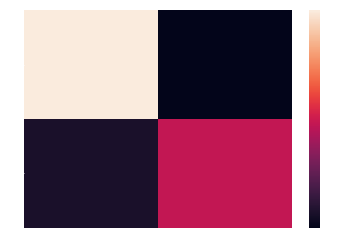

In [56]:
sns.heatmap(cm)

In [59]:
precision_score(result.Survived, result.pred), recall_score(result.Survived, result.pred), f1_score(result.Survived, result.pred)

(0.762962962962963, 0.7103448275862069, 0.7357142857142858)